In [ ]:
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install imblearn
# !{sys.executable} -m pip install ydata-profiling

In [1]:
import os

# Data Handeling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import all_estimators
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score

# Options
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_theme()
pd.set_option('display.float_format', '{:.3f}'.format)

# Initializing Result DataFrame
result_df = pd.DataFrame(columns=['Model', 'Model Type', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1', 'Data Type', 'Settings'])
best_df = pd.DataFrame(columns=['Model', 'Model Type', 'Accuracy', 'Precision', 'Recall', 'F1', 'Data Type', 'Settings'])


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [3]:
df_sample = pd.read_pickle('./Datasets/flight_dataset_sample_small.pkl')

df_sample_enc = pd.get_dummies(df_sample, columns=['DEP_TIME_BLK', 'ARR_TIME_BLK'])
                               
enc = LabelEncoder()

selected_columns = ['TAIL_NUM', 'DEPARTING_AIRPORT', 'CARRIER_NAME', 'PREVIOUS_AIRPORT']

for column in selected_columns:
    df_sample_enc[column] = enc.fit_transform(df_sample_enc[column])

In [4]:
X_enc = df_sample_enc.drop('DEP_DEL15', axis=1)
y_enc = df_sample_enc['DEP_DEL15']

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, test_size=0.20, random_state=68, stratify=y_enc)

In [5]:
df_sample_hot = pd.get_dummies(df_sample, columns=['DEP_TIME_BLK', 'ARR_TIME_BLK', 'TAIL_NUM', 'DEPARTING_AIRPORT', 'CARRIER_NAME', 'PREVIOUS_AIRPORT'])

X_hot = df_sample_hot.drop('DEP_DEL15', axis=1)
y_hot = df_sample_hot['DEP_DEL15']

X_train_hot, X_test_hot, y_train_hot, y_test_hot = train_test_split(X_hot, y_hot, test_size=0.20, random_state=68, stratify=y_hot)

In [6]:
dC = DummyClassifier(strategy="most_frequent", random_state=68)
dC.fit(X_train_enc, y_train_enc)
print(dC.score(X_test_enc, y_test_enc))

0.81085


In [6]:
from sklearn.pipeline import make_pipeline

In [7]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Not Delayed', 'Delayed']

def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None, model=None, model_type=None, params=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}\n\nParams:\n{}".format(
                accuracy,precision,recall,f1_score,params)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        full_title = model + ' - ' + title
        
        plt.title(full_title)
        
    folderstr = './cm/' + model_type + '/' + model
    
    if not os.path.exists(folderstr):
        os.makedirs(folderstr)
        
    savestr = folderstr + '/' + title + '.png'
        
    plt.savefig(savestr, bbox_inches='tight')    

Fitting 3 folds for each of 70 candidates, totalling 210 fits
[CV 1/3] END kneighborsclassifier__metric=manhattan, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform; accuracy: (train=1.000, test=0.722) f1: (train=1.000, test=0.248) precision: (train=1.000, test=0.254) recall: (train=1.000, test=0.242) total time=   7.5s
[CV 2/3] END kneighborsclassifier__metric=manhattan, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform; accuracy: (train=1.000, test=0.722) f1: (train=1.000, test=0.247) precision: (train=1.000, test=0.254) recall: (train=1.000, test=0.241) total time=   7.5s
[CV 3/3] END kneighborsclassifier__metric=manhattan, kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform; accuracy: (train=1.000, test=0.721) f1: (train=1.000, test=0.241) precision: (train=1.000, test=0.248) recall: (train=1.000, test=0.234) total time=   7.5s
[CV 1/3] END kneighborsclassifier__metric=manhattan, kneighborsclassifier__n_neighb

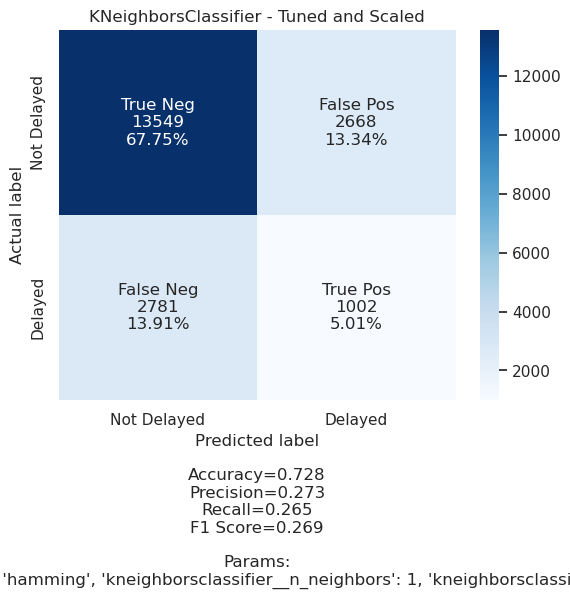

In [10]:
# The scoring methods that needs to be calculated
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

# The different parameters that should be searched by GridSearchCV
param_grid = {
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__n_neighbors': list(range(1, 15, 2)),
    'kneighborsclassifier__metric': ['manhattan', 'euclidean', 'hamming', 'minkowski', 'chebyshev']
}

# Our pipeline that first scales the data without leakage and then fits the model
model = make_pipeline(StandardScaler(), KNeighborsClassifier())

# The grid is build. We are using f1 as our selection method
grid = GridSearchCV(model, param_grid, cv=3, refit='f1', scoring=scoring, return_train_score=True, verbose=3)

# We are fitting the training data
grid.fit(X_train_enc, y_train_enc)

# We are doing a prediction on our test data (used for confusion matrix)
y_pred = grid.predict(X_test_enc)

# Confusion matrix is generated based on the predictions and the actual labels
cm = confusion_matrix(y_test_enc, y_pred, labels=grid.classes_)

# Utilizing a customized function of previous work: https://github.com/DTrimarchi10/confusion_matrix
make_confusion_matrix(cm, group_names=labels, categories=categories, title='Tuned and Scaled', model='KNeighborsClassifier', model_type='neighbors', params=grid.best_params_)

# Generating Different Metrics
print(f'True Positives: {cm[1][1]}')
print(f'False Positives: {cm[0][1]}')
print(f'Training Accuracy: {grid.best_estimator_.score(X_train_enc, y_train_enc):.4f}')
print(f'Testing Accuracy: {grid.best_estimator_.score(X_test_enc, y_test_enc):.4f}')
print(f'Precision: {precision_score(y_test_enc, y_pred):.4f}')
print(f'Recall: {recall_score(y_test_enc, y_pred):.4f}')
print(f'F1: {f1_score(y_test_enc, y_pred):.4f}')

In [11]:
grid.best_params_

{'kneighborsclassifier__metric': 'hamming',
 'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__weights': 'uniform'}

In [12]:
cv_results_df = pd.DataFrame(grid.cv_results_)
        
for index, row in cv_results_df.iterrows():
    result_df.loc[len(result_df)] = ['DecisionTreeClassifier', 'tree', row['mean_train_accuracy'], row['mean_test_accuracy'], row['mean_test_precision'], row['mean_test_recall'], row['mean_test_f1'], 'ONE-HOT ENCODING', row['params']]

result_df.to_pickle('model_results/KNearestNeighbor.pkl')

In [10]:
data = list(zip(X_train_hot.columns.to_list(), grid.best_estimator_.feature_importances_))

feature_df = pd.DataFrame(data, columns=['Features', 'Feature Importance'])

In [13]:
feature_df = feature_df.sort_values(by='Feature Importance', axis=0, ascending=False).head(15)

feature_df.to_pickle('model_results/RandomForestClassifier_Features.pkl')


In [15]:
feature_df

,Features,Feature Importance
18,AWND,0.040
17,TMAX,0.039
4,CONCURRENT_FLIGHTS,0.035
6,AIRPORT_FLIGHTS_MONTH,0.033
8,AIRLINE_AIRPORT_FLIGHTS_MONTH,0.032
14,PRCP,0.029
2,DEST_AIRPORT_ID,0.028
7,AIRLINE_FLIGHTS_MONTH,0.028
13,PLANE_AGE,0.027
1,DAY_OF_WEEK,0.026


In [16]:
feature_df.style.background_gradient(subset='Feature Importance')


,Features,Feature Importance
18,AWND,0.040298
17,TMAX,0.038707
4,CONCURRENT_FLIGHTS,0.035346
6,AIRPORT_FLIGHTS_MONTH,0.033227
8,AIRLINE_AIRPORT_FLIGHTS_MONTH,0.031865
14,PRCP,0.028739
2,DEST_AIRPORT_ID,0.028273
7,AIRLINE_FLIGHTS_MONTH,0.027755
13,PLANE_AGE,0.027295
1,DAY_OF_WEEK,0.025532
